<a href="https://colab.research.google.com/github/Judysonandrade/AN-LISE-EXPLORAT-RIA-DE-DADOS-DE-LOW-GRADE-GLIOMA/blob/main/Projeto_Final_Analise_Exploratoria_de_Dados_de_Glioma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Biblioteca Necessaria para baixar o arquivo TSV para ser analisado



In [61]:
!pip install --upgrade gdown

Bibliotecas Necessarias utilizadas para manipulação do Dataset

In [62]:
# utilizar os Dataframes do Pandas para manipular as instâncias
import pandas as pd
# matplotlib para visualizar
import matplotlib.pyplot as plt
# gdown para baixar os dados
import gdown
plt.style.use('ggplot')
import numpy as np

In [63]:
url = 'https://drive.google.com/file/d/1ytalQICdB9O51j5COVMmXrymXMYJNp9h/view?usp=sharing'
output = 'lgg.clinic.tsv'
gdown.download(url=url, output=output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1ytalQICdB9O51j5COVMmXrymXMYJNp9h
To: /content/lgg.clinic.tsv
100%|██████████| 172k/172k [00:00<00:00, 6.29MB/s]


'lgg.clinic.tsv'

In [64]:
file_path = 'lgg.clinic.tsv'  # Substitua pelo caminho do seu arquivo
clinicalraw = pd.read_csv(file_path, sep='\t')

Carregando as 5 primeiras linhas e colunas do dataset, tudo isso usando o head



In [65]:
clinicalraw.head()

,bcr_patient_barcode,histologic_diagnosis,tumor_grade,laterality,tumor_site,supratentorial_localization,gender,race,ethnicity,history_other_malignancy,...,family_history_brain_tumor,performance_status_timing,radiation_treatment_adjuvant,pharmaceutical_tx_adjuvant,treatment_outcome_first_course,new_tumor_event_dx_indicator,age_at_initial_pathologic_diagnosis,patient_id,tissue_source_site,tumor_tissue_site
0,TCGA-CS-4938,Astrocytoma,G2,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,FEMALE,WHITE,NOT HISPANIC OR LATINO,No,...,YES,Preoperative,[Not Available],[Not Available],[Not Available],[Not Available],16,4938,CS,Central nervous system
1,TCGA-CS-4941,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",Cerebral Cortex,MALE,WHITE,NOT HISPANIC OR LATINO,No,...,[Not Available],Preoperative,[Not Available],[Not Available],[Not Available],[Not Available],52,4941,CS,Central nervous system
2,TCGA-CS-4942,Astrocytoma,G3,Right,"Supratentorial, Frontal Lobe",White Matter,FEMALE,BLACK OR AFRICAN AMERICAN,[Not Available],No,...,NO,Preoperative,[Not Available],[Not Available],[Not Available],[Not Available],29,4942,CS,Central nervous system
3,TCGA-CS-4943,Astrocytoma,G3,Left,"Supratentorial, Frontal Lobe",Cerebral Cortex,MALE,WHITE,[Not Available],No,...,[Not Available],Preoperative,[Not Available],[Not Available],[Not Available],[Not Available],22,4943,CS,Central nervous system
4,TCGA-CS-4944,Astrocytoma,G2,Right,"Supratentorial, Temporal Lobe",Cerebral Cortex,MALE,WHITE,[Not Available],No,...,[Not Available],Preoperative,[Not Available],[Not Available],[Not Available],[Not Available],35,4944,CS,Central nervous system


Verificando as colunas e informações do meu dataset

In [66]:
clinicalraw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   bcr_patient_barcode                  515 non-null    object
 1   histologic_diagnosis                 515 non-null    object
 2   tumor_grade                          515 non-null    object
 3   laterality                           515 non-null    object
 4   tumor_site                           515 non-null    object
 5   supratentorial_localization          515 non-null    object
 6   gender                               515 non-null    object
 7   race                                 515 non-null    object
 8   ethnicity                            515 non-null    object
 9   history_other_malignancy             515 non-null    object
 10  history_neoadjuvant_treatment        515 non-null    object
 11  initial_pathologic_dx_year           515 non-

Verificar quantos valores faltantes (NaN) existem em cada coluna do DataFrame

In [67]:
clinicalraw.isna().sum()

,0
bcr_patient_barcode,0
histologic_diagnosis,0
tumor_grade,0
laterality,0
tumor_site,0
supratentorial_localization,0
gender,0
race,0
ethnicity,0
history_other_malignancy,0


Colunas com valores ausentes, id e desproporcionalidade

In [68]:
colunas_pararemover = [
    'bcr_patient_uuid', 'retrospective_collection', 'prospective_collection', 'birth_days_to', 'allergy_food_dx_indicator',
    'asthma_eczema_allergy_first_dx', 'allergy_food_dx_age', 'allergy_animals_insects_dx_age', 'allergy_food_dx_type',
    'allergy_animals_insects_dx_type', 'icd_o_3_site', 'icd_o_3_histology', 'inherited_genetic_syndrome_specified',
    'inherited_genetic_syndrome_indicator', 'idh1_mutation_test_indicator', 'idh1_mutation_test_method', 'idh1_mutation_found',
    'project_code', 'informed_consent_verified', 'icd_10', 'disease_code', 'days_to_initial_pathologic_diagnosis',
    'karnofsky_score', 'ecog_score', 'performance_status_days_to', 'form_completion_date',
    'history_asthma', 'history_eczema', 'histor_hay_fever', 'history_dust_mold_allergy', 'allergy_animals_insects_dx_indicator',
    'days_to_tumor_progression', 'days_to_patient_progression_free', 'extranodal_involvement'
]


Remover os valores das colunas da lista 'colunas_pararemover' que existem no DataFrame clinical_cleaned e armazena o resultado no DataFrame clinical_validos

In [69]:
clinical_validos = clinicalraw.copy()
clinical_validos = clinical_validos.drop(columns=[col for col in colunas_pararemover if col in clinical_validos.columns])

Verificando se tem mais alguma coluna com NAN

In [70]:
clinical_validos.columns[clinical_validos.isna().all()]

Index([], dtype='object')

Verificando as colunas que tem Not Available como resposta


In [71]:
na_count = (clinical_validos == '[Not Available]').sum()
print("Valores '[Not Available]' por coluna:\n", na_count[na_count>0])

Valores '[Not Available]' por coluna:
 laterality                           5
supratentorial_localization         29
race                                 2
ethnicity                           13
history_ionizing_rt_to_head         19
history_seizures                    26
history_headaches                   42
symp_changes_mental_status          43
symp_changes_visual                 47
symp_changes_sensory                49
symp_changes_motor_movement         48
related_symptom_first_present       53
first_symptom_longest_duration      71
history_neoadjuvant_steroid_tx      79
history_neoadjuvant_medication      88
tumor_status                        34
family_history_cancer_indicator     86
family_history_brain_tumor          82
performance_status_timing          189
radiation_treatment_adjuvant       211
pharmaceutical_tx_adjuvant         211
treatment_outcome_first_course     217
new_tumor_event_dx_indicator       217
dtype: int64


Remover as 2 primeiras linhas (se necessário)

In [72]:

clinical_validos = clinical_validos.iloc[2:]

Converter para numérico para obter uma melhor analise

In [73]:
numerico = [
    'initial_pathologic_dx_year', 'last_contact_days_to', 'death_days_to', 'age_at_initial_pathologic_diagnosis'
]
for col in numerico:
    clinical_validos[col] = pd.to_numeric(clinical_validos[col], errors='coerce')

 Converter todas as colunas de texto para categorias

In [74]:
for col in clinical_validos.select_dtypes(include='object').columns:
    clinical_validos[col] = clinical_validos[col].astype('category')

# Exceção: manter 'bcr_patient_barcode' como string
clinical_validos['bcr_patient_barcode'] = clinical_validos['bcr_patient_barcode'].astype(str)

Grafico da distruibuição dos pacientes pela variavel gender, ou seja, pelo sexo

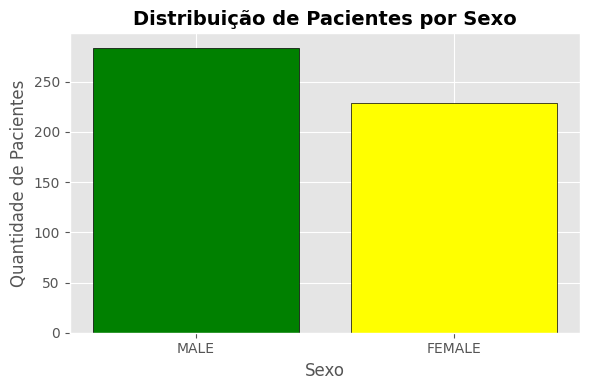

In [75]:
cont = clinical_validos['gender'].value_counts()

plt.figure(figsize=(6, 4))
barras = plt.bar(cont.index, cont.values, color=['green', 'yellow'], edgecolor='black')

plt.title('Distribuição de Pacientes por Sexo', fontsize=14, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)

plt.tight_layout()
plt.show()


Grafico da distruibuição dos pacientes de vivos ou mortos pelo sexo

<ipython-input-76-3682f19b1a52>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = clinical_validos.groupby(['gender', 'vital_status']).size().unstack(fill_value=0)


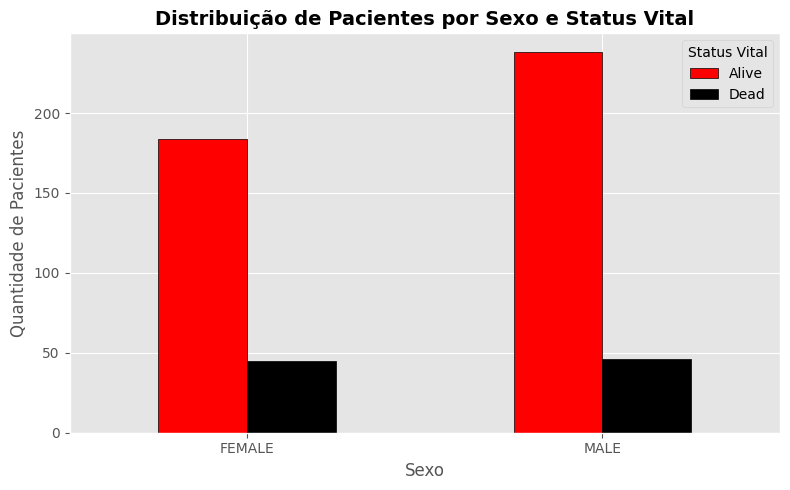

In [76]:
count_data = clinical_validos.groupby(['gender', 'vital_status']).size().unstack(fill_value=0)

count_data.plot(kind='bar', figsize=(8, 5), color=['red', 'black'], edgecolor='black')

plt.title('Distribuição de Pacientes por Sexo e Status Vital', fontsize=14, fontweight='bold')
plt.xlabel('Sexo', fontsize=12)
plt.ylabel('Quantidade de Pacientes', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Status Vital')
plt.tight_layout()
plt.show()

Verificação de quantos mortos e vivos durante a primeira semana de sintomas.


<ipython-input-77-fc3b97742f1a>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = clinical_validos.groupby(['first_symptom_longest_duration', 'vital_status']).size().unstack(fill_value=0)


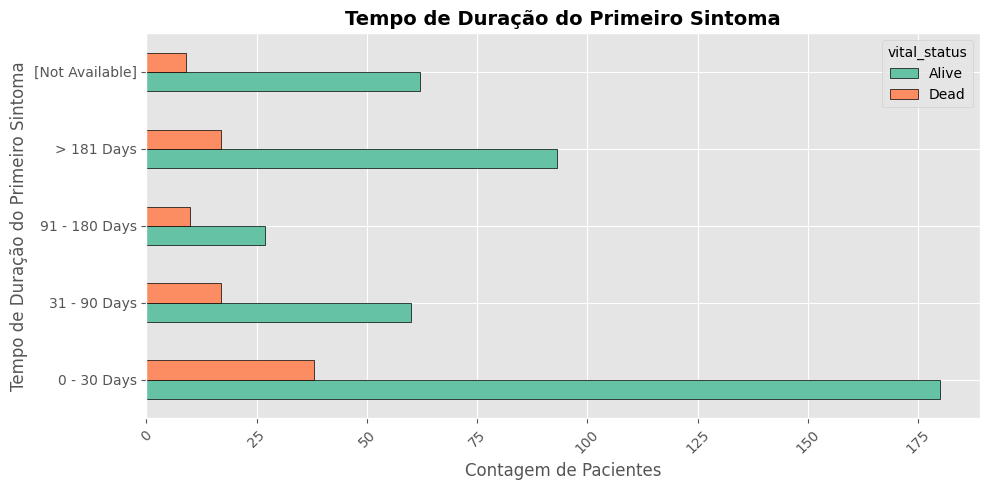

In [77]:

count_data = clinical_validos.groupby(['first_symptom_longest_duration', 'vital_status']).size().unstack(fill_value=0)


count_data.plot(kind='barh', stacked=False, figsize=(10, 5), edgecolor='black', color=['#66c2a5', '#fc8d62'])


plt.title('Tempo de Duração do Primeiro Sintoma', fontsize=14, fontweight='bold')
plt.xlabel('Contagem de Pacientes', fontsize=12)
plt.ylabel('Tempo de Duração do Primeiro Sintoma', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Comparação entre Status Vital e Diagnóstivo Histológico

<ipython-input-78-ca536808f8fe>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = clinical_validos.groupby(['vital_status', 'histologic_diagnosis']).size().unstack(fill_value=0)


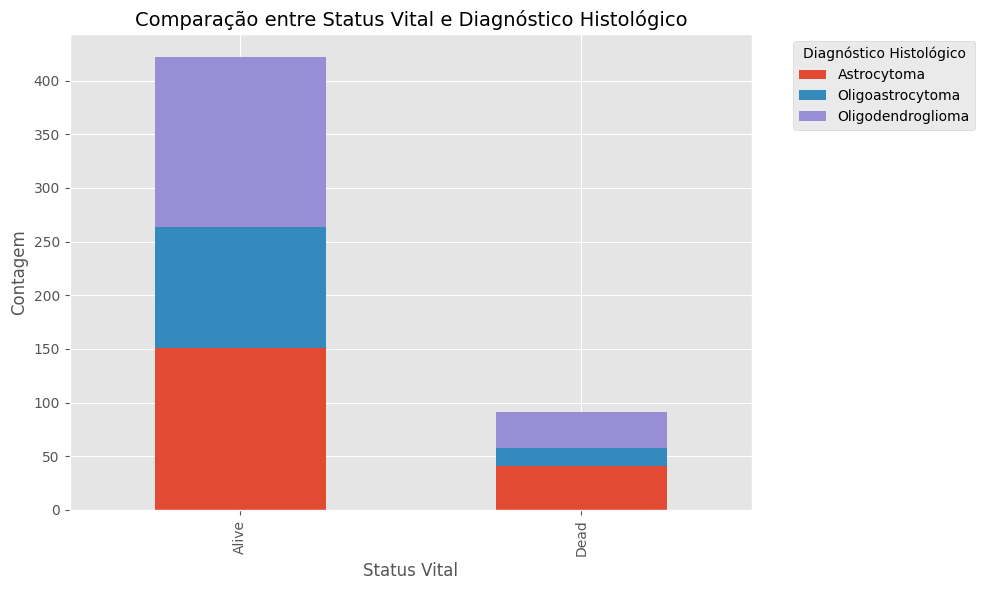

In [78]:
count_data = clinical_validos.groupby(['vital_status', 'histologic_diagnosis']).size().unstack(fill_value=0)


count_data.plot(kind='bar', stacked=True, figsize=(10, 6))


plt.title('Comparação entre Status Vital e Diagnóstico Histológico', fontsize=14)
plt.xlabel('Status Vital', fontsize=12)
plt.ylabel('Contagem', fontsize=12)

plt.legend(title='Diagnóstico Histológico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



Contagem entre 'histologic_diagnosis' e 'vital_status'

In [79]:
hist = pd.crosstab(clinical_validos['vital_status'], clinical_validos['histologic_diagnosis'])
print(hist)

histologic_diagnosis  Astrocytoma  Oligoastrocytoma  Oligodendroglioma
vital_status                                                          
Alive                         151               113                158
Dead                           41                17                 33


Plot de contagem entre 'histologic_diagnosis' e 'vital_status'

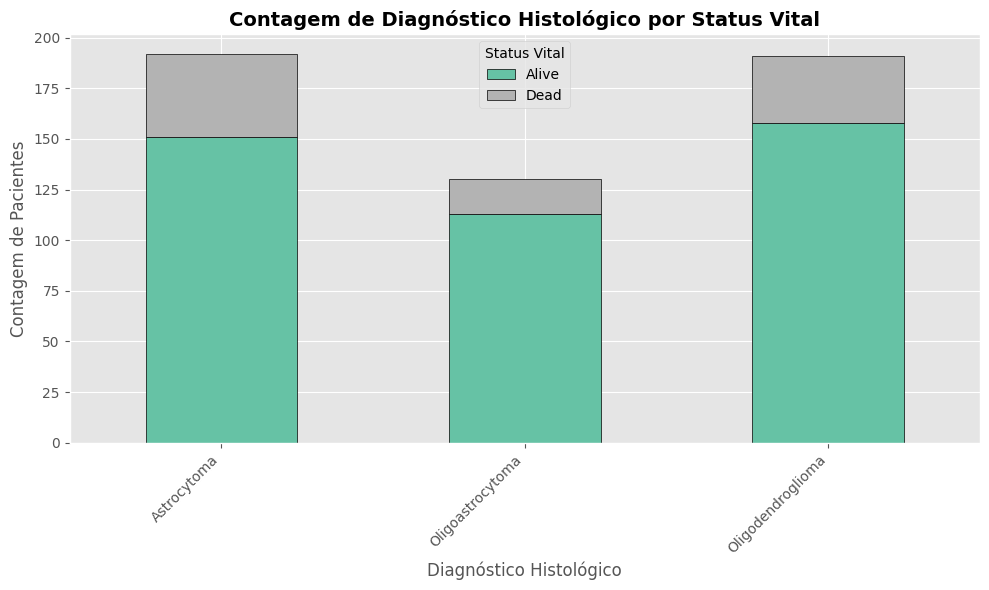

In [80]:

hist = pd.crosstab(clinical_validos['histologic_diagnosis'], clinical_validos['vital_status'], dropna=True)

hist.plot(kind='bar', stacked=True, figsize=(10, 6), edgecolor='black', cmap='Set2')

plt.title('Contagem de Diagnóstico Histológico por Status Vital', fontsize=14, fontweight='bold')
plt.xlabel('Diagnóstico Histológico', fontsize=12)
plt.ylabel('Contagem de Pacientes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Status Vital')

plt.tight_layout()
plt.show()


Histograma do ultimo dia de acompanhamento

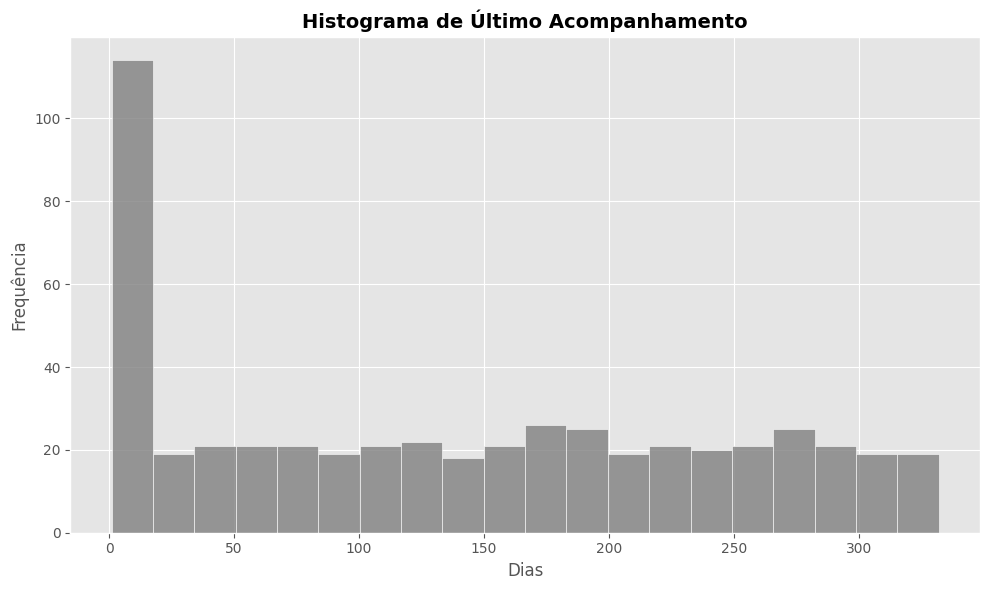

In [81]:
plt.figure(figsize=(10, 6))
plt.hist(clinical_validos['last_contact_days_to'], bins=20, color='grey', edgecolor='white', alpha=0.8)

plt.title("Histograma de Último Acompanhamento", fontsize=14, fontweight='bold')
plt.xlabel("Dias", fontsize=12)
plt.ylabel("Frequência", fontsize=12)

plt.tight_layout()
plt.show()


boxplot das idades mais antigidas pelo status vital

<ipython-input-82-655fd8109f23>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


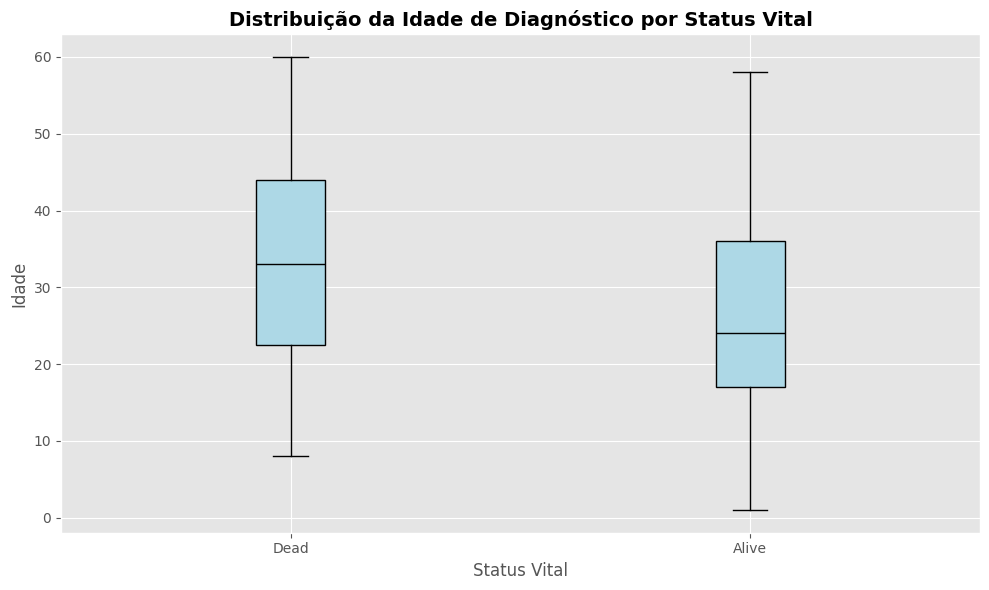

In [82]:

plt.figure(figsize=(10, 6))

plt.boxplot(
    [clinical_validos[clinical_validos['vital_status'] == status]['age_at_initial_pathologic_diagnosis'] for status in clinical_validos['vital_status'].unique()],
    labels=clinical_validos['vital_status'].unique(),
    patch_artist=True,
    boxprops=dict(facecolor='lightblue', color='black'),
    medianprops=dict(color='black'),
    whiskerprops=dict(color='black'),
    capprops=dict(color='black')
)

plt.title("Distribuição da Idade de Diagnóstico por Status Vital", fontsize=14, fontweight='bold')
plt.xlabel("Status Vital", fontsize=12)
plt.ylabel("Idade", fontsize=12)


plt.tight_layout()
plt.show()

In [83]:
import scipy.stats as stats

# Filtrando os dados para as duas categorias de vital_status
group_alive = clinical_validos[clinical_validos['vital_status'] == 'Alive']['age_at_initial_pathologic_diagnosis']
group_dead = clinical_validos[clinical_validos['vital_status'] == 'Dead']['age_at_initial_pathologic_diagnosis']

# Realizando o teste t para amostras independentes
t_stat, p_value = stats.ttest_ind(group_alive.dropna(), group_dead.dropna())

# Exibindo os resultados
print(f'Test Statistic: {t_stat}')
print(f'P-Value: {p_value}')



Test Statistic: -4.652451649225361
P-Value: 4.183756215301226e-06


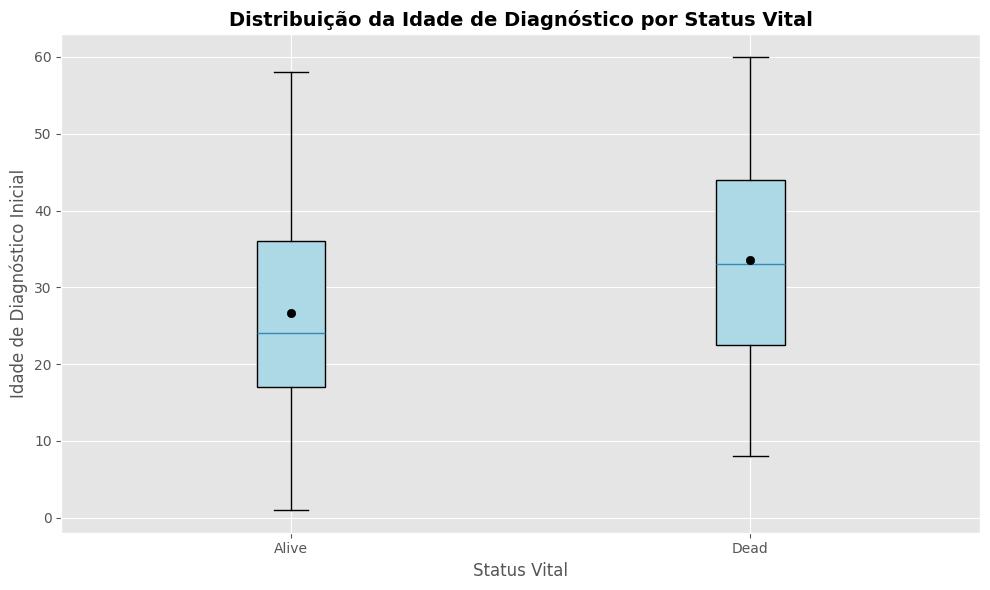

In [84]:
# Dados para os dois grupos
group_alive = clinical_validos[clinical_validos['vital_status'] == 'Alive']['age_at_initial_pathologic_diagnosis']
group_dead = clinical_validos[clinical_validos['vital_status'] == 'Dead']['age_at_initial_pathologic_diagnosis']


plt.figure(figsize=(10, 6))
plt.boxplot([group_alive, group_dead], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'),
            whiskerprops=dict(color='black'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=6))

mean_alive = np.mean(group_alive)
mean_dead = np.mean(group_dead)

plt.scatter([1], [mean_alive], color='black', zorder=5)  # Média para 'Alive'
plt.scatter([2], [mean_dead], color='black', zorder=5)  # Média para 'Dead'

plt.title('Distribuição da Idade de Diagnóstico por Status Vital', fontsize=14, fontweight='bold')
plt.xlabel('Status Vital', fontsize=12)
plt.ylabel('Idade de Diagnóstico Inicial', fontsize=12)
plt.xticks([1, 2], ['Alive', 'Dead'])


plt.tight_layout()
plt.show()

In [85]:
clinical_validos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 2 to 514
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype   
---  ------                               --------------  -----   
 0   bcr_patient_barcode                  513 non-null    object  
 1   histologic_diagnosis                 513 non-null    category
 2   tumor_grade                          513 non-null    category
 3   laterality                           513 non-null    category
 4   tumor_site                           513 non-null    category
 5   supratentorial_localization          513 non-null    category
 6   gender                               513 non-null    category
 7   race                                 513 non-null    category
 8   ethnicity                            513 non-null    category
 9   history_other_malignancy             513 non-null    category
 10  history_neoadjuvant_treatment        513 non-null    category
 11  initial_pathologic_

<ipython-input-86-52a9f7bdfd0b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = clinical_validos.groupby('histologic_diagnosis')[['last_contact_days_to', 'death_days_to']].mean().reset_index()


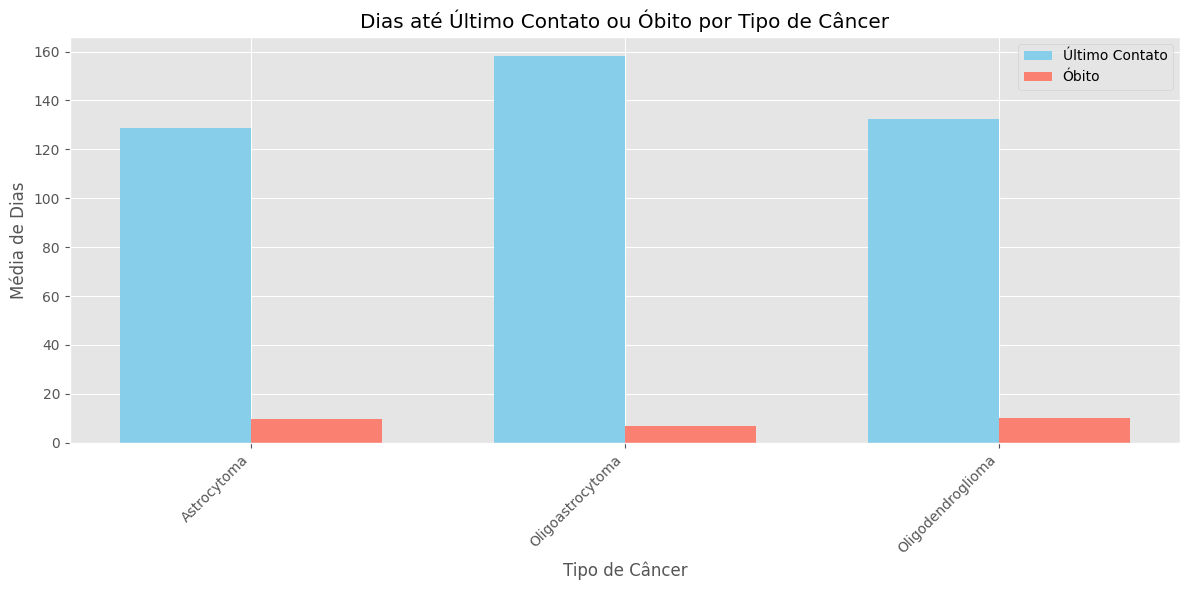

In [86]:

df_grouped = clinical_validos.groupby('histologic_diagnosis')[['last_contact_days_to', 'death_days_to']].mean().reset_index()


plt.figure(figsize=(12, 6))
bar_width = 0.35
x = range(len(df_grouped))


plt.bar(x, df_grouped['last_contact_days_to'], width=bar_width, label='Último Contato', color='skyblue')
plt.bar([i + bar_width for i in x], df_grouped['death_days_to'], width=bar_width, label='Óbito', color='salmon')


plt.xticks([i + bar_width / 2 for i in x], df_grouped['histologic_diagnosis'], rotation=45, ha='right')
plt.xlabel('Tipo de Câncer')
plt.ylabel('Média de Dias')
plt.title('Dias até Último Contato ou Óbito por Tipo de Câncer')
plt.legend()
plt.tight_layout()
plt.show()

<ipython-input-87-603a013f2632>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_laterality = dados_filtrados.groupby(['vital_status', 'laterality']).size().unstack(fill_value=0)


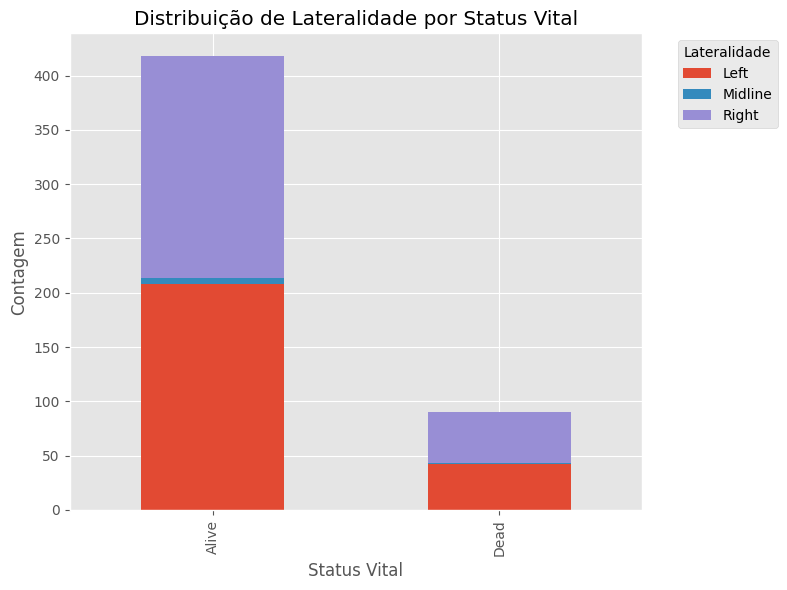

In [87]:

# Filtrar os dados para não incluir '[Not Available]'
dados_filtrados = clinical_validos[clinical_validos['laterality'] != '[Not Available]']

# Agrupar e criar tabela de contagem
count_laterality = dados_filtrados.groupby(['vital_status', 'laterality']).size().unstack(fill_value=0)


ax = count_laterality.plot(kind='bar', stacked=True, figsize=(8, 6))


handles, labels = ax.get_legend_handles_labels()

handles_labels_filtrados = [(h, l) for h, l in zip(handles, labels) if l != '[Not Available]']

handles_filtrados, labels_filtrados = zip(*handles_labels_filtrados)

plt.legend(handles_filtrados, labels_filtrados, title='Lateralidade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.title('Distribuição de Lateralidade por Status Vital')
plt.xlabel('Status Vital')
plt.ylabel('Contagem')
plt.tight_layout()
plt.show()


A partir daqui tive ajuda do chatgpt para passar alguns parametros de filtragem do meu dataset


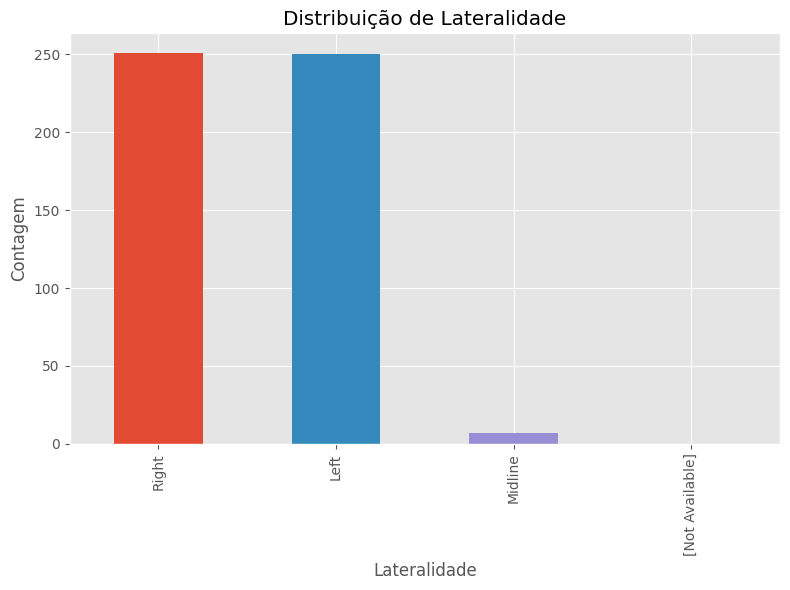

In [88]:
# Filtrar os dados para não incluir '[Not Available]'
dados_filtrados = clinical_validos[clinical_validos['laterality'] != '[Not Available]']

count_laterality = dados_filtrados['laterality'].value_counts()

ax = count_laterality.plot(kind='bar', figsize=(8, 6), color=['#E24A33', '#348ABD', '#988ED5'])  # cores só de Left, Midline e Right

plt.title('Distribuição de Lateralidade')
plt.xlabel('Lateralidade')
plt.ylabel('Contagem')

plt.tight_layout()
plt.show()


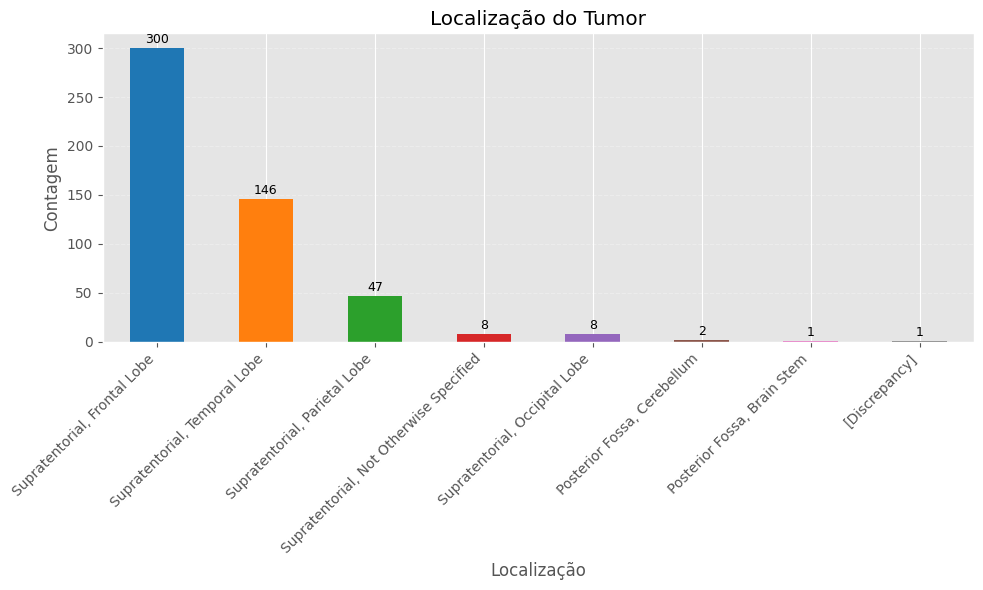

In [89]:

dados_filtrados = clinical_validos[clinical_validos['tumor_site'] != '[Not Available]']


resultados_filtros = dados_filtrados['tumor_site'].value_counts()

# Plotar o gráfico
ax = resultados_filtros.plot(
    kind='bar',
    figsize=(10, 6),
    color=plt.cm.tab10.colors #Mapa de Cores Datacamp
)

# Título e eixos
plt.title('Localização do Tumor')
plt.xlabel('Localização')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')

# Mostrar os valores no topo de cada barra
for i, value in enumerate(resultados_filtros.values):
    plt.text(i, value + 2, str(value), ha='center', va='bottom', fontsize=9)


plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

<ipython-input-90-ecd5bab0f19f>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = dados_filtrados.groupby(['tumor_site', 'vital_status']).size().unstack(fill_value=0)


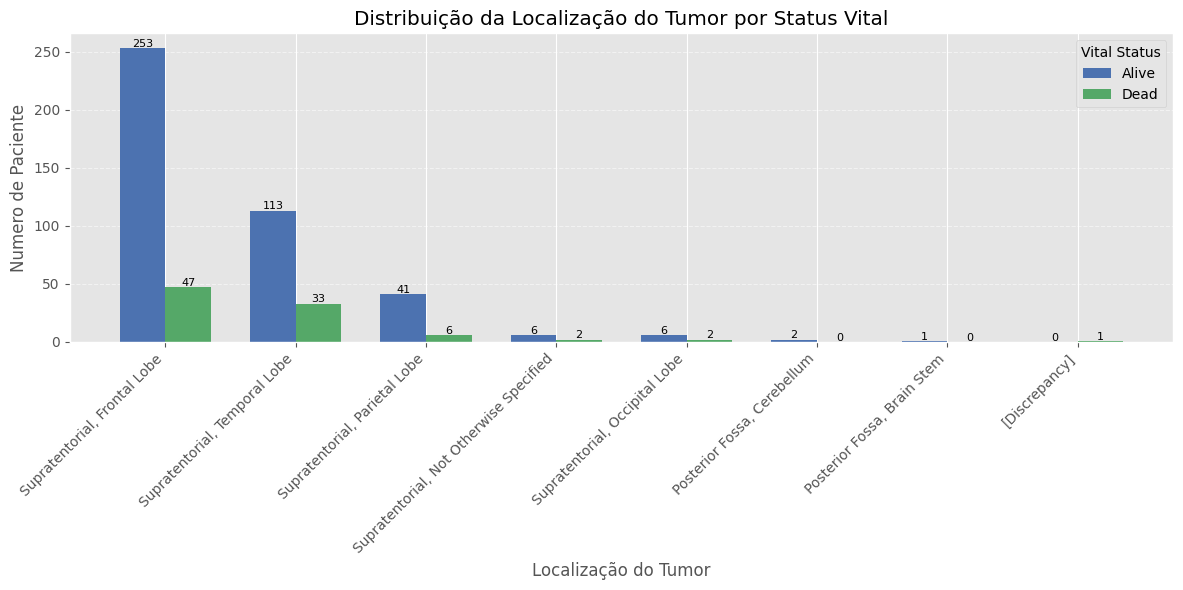

In [90]:
# Filtrar valores válidos
dados_filtrados = clinical_validos[
    (clinical_validos['tumor_site'] != '[Not Available]') &
    (clinical_validos['vital_status'].isin(['Alive', 'Dead']))
]

# Agrupar por status vital e localização do tumor
grouped = dados_filtrados.groupby(['tumor_site', 'vital_status']).size().unstack(fill_value=0)

# Ordenar para manter consistência visual
grouped = grouped.sort_values(by='Alive', ascending=False)

# variáveis
tumor_sites = grouped.index.tolist()
alive_counts = grouped['Alive'].tolist()
dead_counts = grouped['Dead'].tolist()
bar_width = 0.35
x = np.arange(len(tumor_sites))


plt.figure(figsize=(12, 6))


plt.bar(x - bar_width/2, alive_counts, width=bar_width, label='Alive', color='#4C72B0')
plt.bar(x + bar_width/2, dead_counts, width=bar_width, label='Dead', color='#55A868')


plt.xlabel('Localização do Tumor')
plt.ylabel('Numero de Paciente')
plt.title('Distribuição da Localização do Tumor por Status Vital')
plt.xticks(ticks=x, labels=tumor_sites, rotation=45, ha='right')
plt.legend(title='Vital Status')

# Mostrar valores no topo das barras, REFERENCIA DATACAMP
for i in range(len(x)):
    plt.text(x[i] - bar_width/2, alive_counts[i] + 1, str(alive_counts[i]), ha='center', fontsize=8)
    plt.text(x[i] + bar_width/2, dead_counts[i] + 1, str(dead_counts[i]), ha='center', fontsize=8)


plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

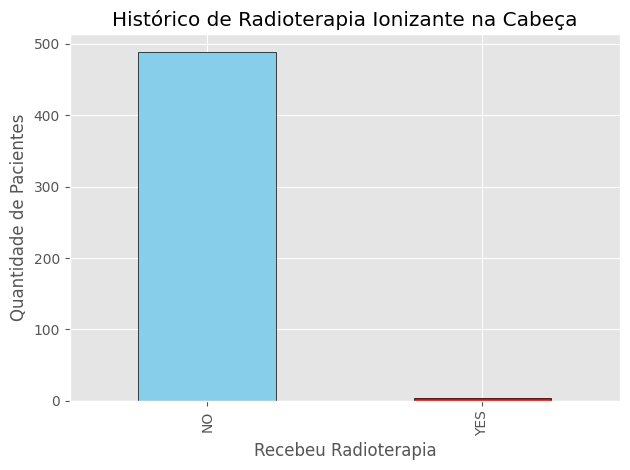

In [91]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_ionizing_rt_to_head'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['history_ionizing_rt_to_head'].value_counts()

count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

ax = count_rt.plot(kind='bar', color=['skyblue', 'red'], edgecolor='black')

plt.title('Histórico de Radioterapia Ionizante na Cabeça')
plt.xlabel('Recebeu Radioterapia')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()


<ipython-input-92-6664eb93ecd1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['history_ionizing_rt_to_head','vital_status']).size().unstack(fill_value=0)


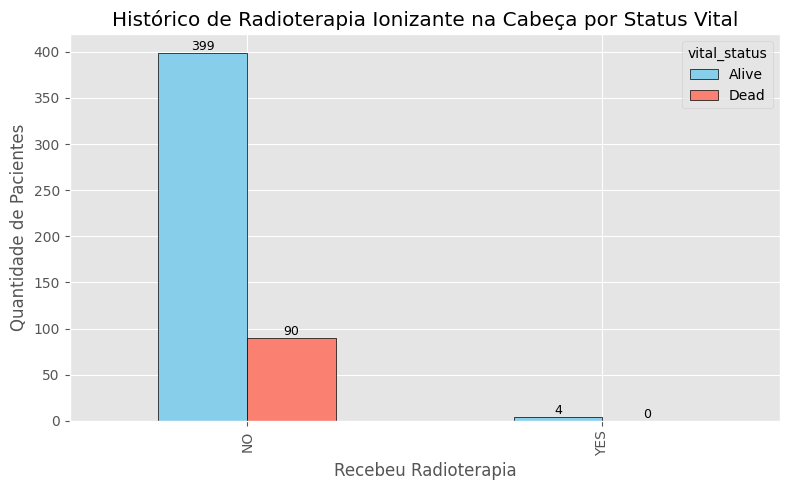

In [92]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_ionizing_rt_to_head'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['history_ionizing_rt_to_head','vital_status']).size().unstack(fill_value=0)

count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(8, 5), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9)

plt.title('Histórico de Radioterapia Ionizante na Cabeça por Status Vital')
plt.xlabel('Recebeu Radioterapia')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

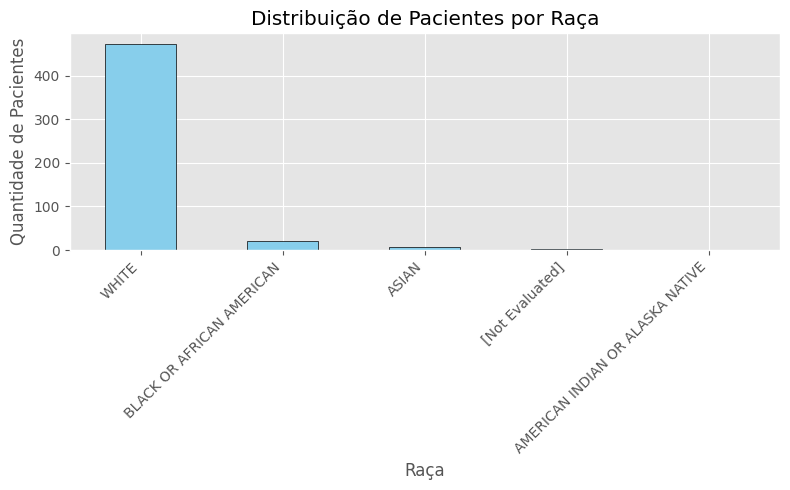

In [93]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['race'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores de cada raça
count_race = dados_filtrados['race'].value_counts()

count_race = count_race.loc[~count_race.index.isin(['[Not Available]', '[Unknown]'])]

# Plota o gráfico de barras
ax = count_race.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))


# Ajusta os detalhes do gráfico
plt.title('Distribuição de Pacientes por Raça')
plt.xlabel('Raça')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-94-0ca716bcf905>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['race','vital_status']).size().unstack(fill_value=0)


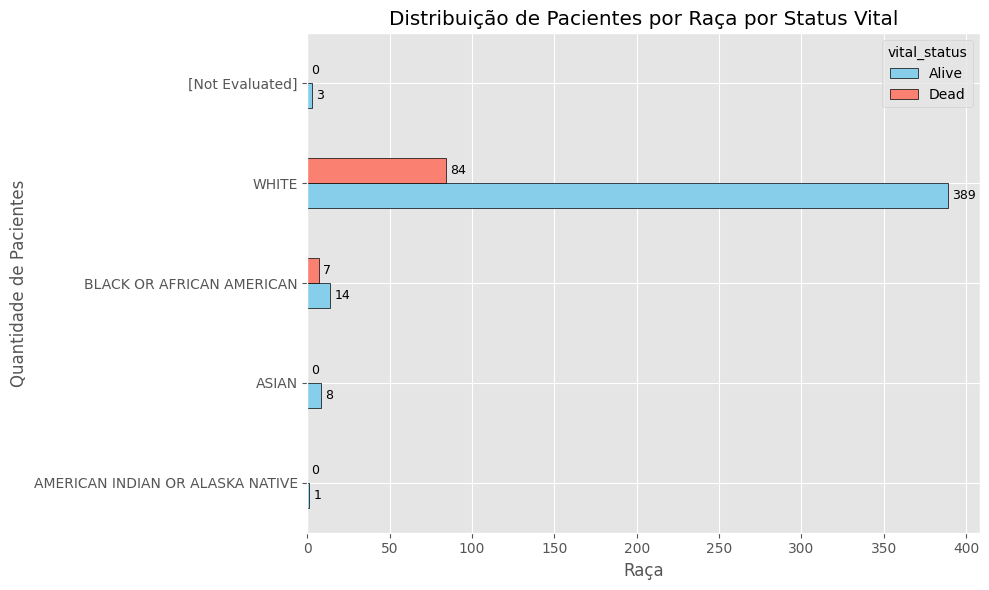

In [94]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['race'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['race','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='barh', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Distribuição de Pacientes por Raça por Status Vital')
plt.xlabel('Raça')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

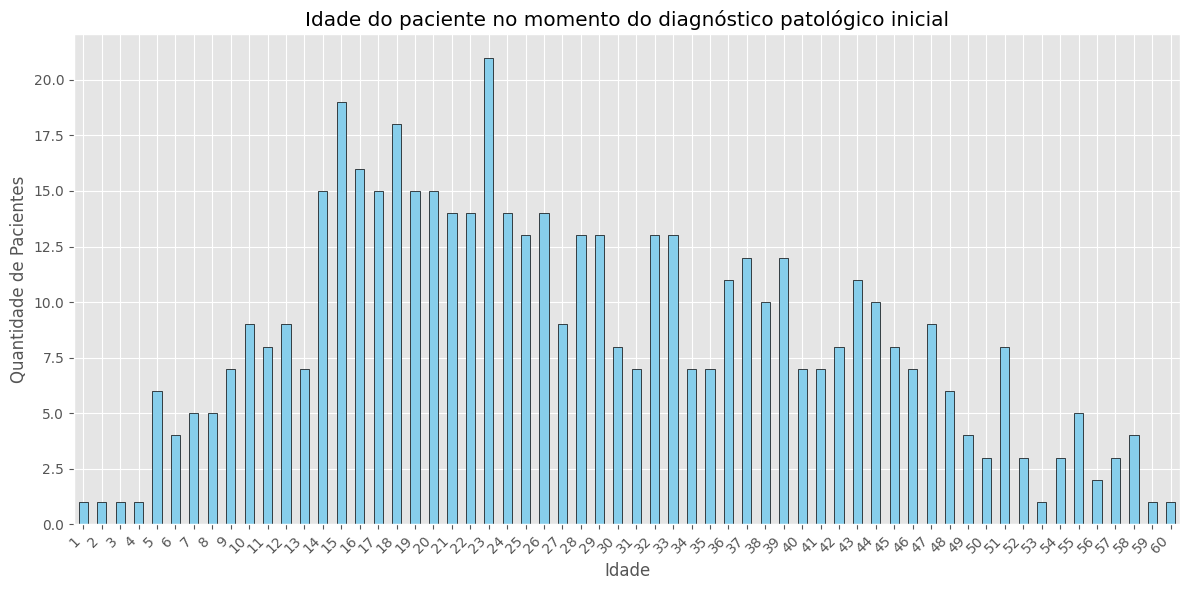

In [95]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['age_at_initial_pathologic_diagnosis'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores de cada raça
count_race = dados_filtrados['age_at_initial_pathologic_diagnosis'].value_counts().sort_index()

count_race = count_race.loc[~count_race.index.isin(['[Not Available]', '[Unknown]'])]

# Plota o gráfico de barras
ax = count_race.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(12, 6))


# Ajusta os detalhes do gráfico
plt.title('Idade do paciente no momento do diagnóstico patológico inicial')
plt.xlabel('Idade')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-96-e9af2655fb57>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['faixa_etaria', 'vital_status']).size().unstack(fill_value=0)


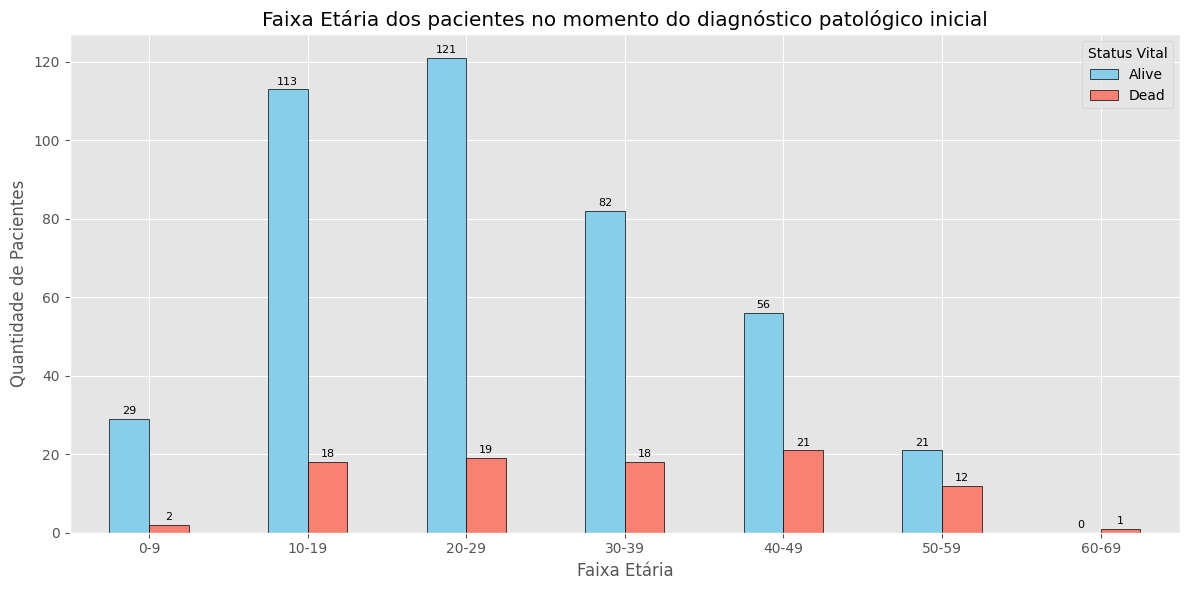

In [96]:


# Agrupamento por faixas etárias
bins = list(range(0, 79, 10))  # Ajuda do ChatGpt
labels = [f'{i}-{i+9}' for i in bins[:-1]]
dados_filtrados['faixa_etaria'] = pd.cut(
    dados_filtrados['age_at_initial_pathologic_diagnosis'].astype(float),
    bins=bins,
    labels=labels,
    right=False
)

# Agrupar por faixa e status vital
count_grupo = dados_filtrados.groupby(['faixa_etaria', 'vital_status']).size().unstack(fill_value=0)

# Plot
ax = count_grupo.plot(kind='bar', figsize=(12, 6), edgecolor='black', color=['skyblue', 'salmon'])

# Rótulos
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=2)

# Títulos e eixos
plt.title('Faixa Etária dos pacientes no momento do diagnóstico patológico inicial')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Status Vital')
plt.tight_layout()
plt.show()


In [97]:
idades = clinical_validos['age_at_initial_pathologic_diagnosis'].dropna()

# Computa frequências e seleciona as 3 idades mais comuns
top3 = idades.value_counts().head(3)
print(top3)

age_at_initial_pathologic_diagnosis
23    21
15    19
18    18
Name: count, dtype: int64


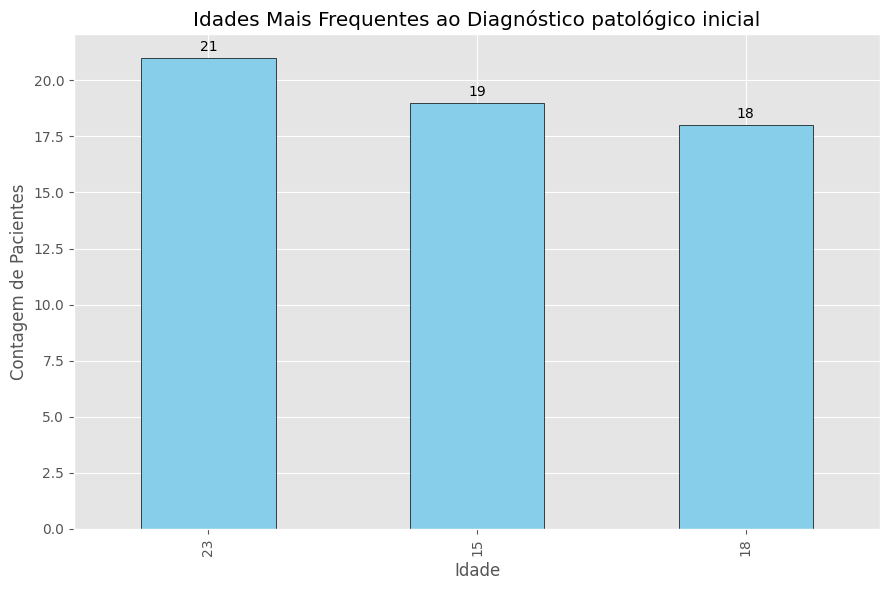

In [98]:
# Gráfico de barras do Top-3
ax = top3.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(9,6))
plt.title('Idades Mais Frequentes ao Diagnóstico patológico inicial')
plt.xlabel('Idade')
plt.ylabel('Contagem de Pacientes')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=3)

plt.tight_layout()
plt.show()


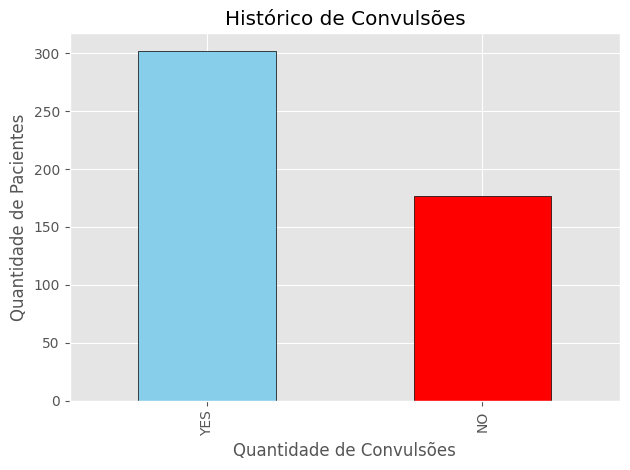

In [99]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_seizures'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['history_seizures'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'red'], edgecolor='black')

plt.title('Histórico de Convulsões')
plt.xlabel('Quantidade de Convulsões')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()


<ipython-input-100-c89a0f762e4e>:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['faixa_etaria', 'history_seizures']).size().unstack(fill_value=0)


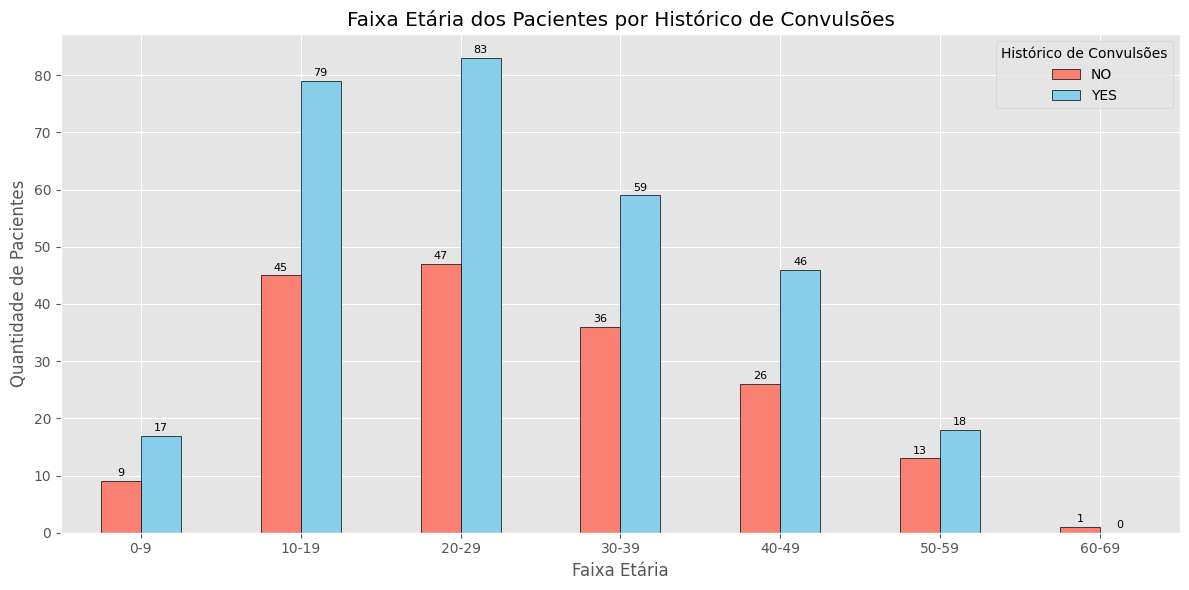

In [100]:
# 1. Filtra os dados válidos
dados_filtrados = clinical_validos[
    ~clinical_validos['history_seizures'].isin(['[Not Available]', '[Unknown]'])
].copy()

# Remove categorias indesejadas da legenda
dados_filtrados['history_seizures'] = dados_filtrados['history_seizures'].astype('category')
dados_filtrados['history_seizures'] = dados_filtrados['history_seizures'].cat.remove_categories(['[Not Available]', '[Unknown]'])

# 2. Agrupamento por faixas etárias - Ajuda do Chat
bins = list(range(0, 80, 10))
labels = [f'{i}-{i+9}' for i in bins[:-1]]
dados_filtrados['faixa_etaria'] = pd.cut(
    dados_filtrados['age_at_initial_pathologic_diagnosis'].astype(float),
    bins=bins,
    labels=labels,
    right=False
)

# 3. Agrupamento
count_grupo = dados_filtrados.groupby(['faixa_etaria', 'history_seizures']).size().unstack(fill_value=0)

# 4. Plot
ax = count_grupo.plot(kind='bar', figsize=(12, 6), edgecolor='black', color=['salmon', 'skyblue'])

# 5. Rótulos
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=8, padding=2)

# 6. Títulos
plt.title('Faixa Etária dos Pacientes por Histórico de Convulsões')
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade de Pacientes')
plt.xticks(rotation=0)
plt.legend(title='Histórico de Convulsões')
plt.tight_layout()
plt.show()



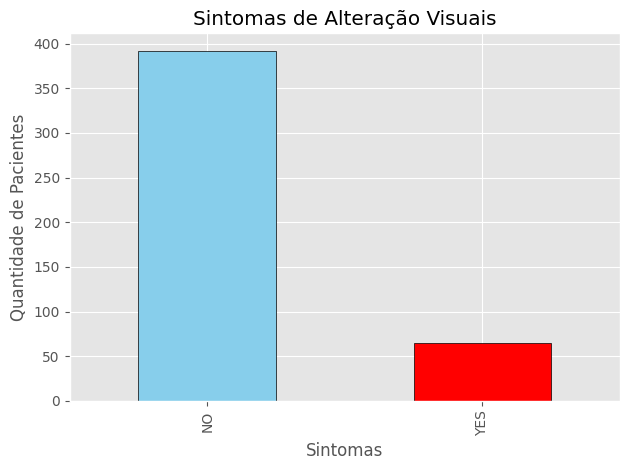

In [101]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_visual'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['symp_changes_visual'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'red'], edgecolor='black')

plt.title('Sintomas de Alteração Visuais')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

<ipython-input-102-2a84c8eaa580>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['symp_changes_visual','vital_status']).size().unstack(fill_value=0)


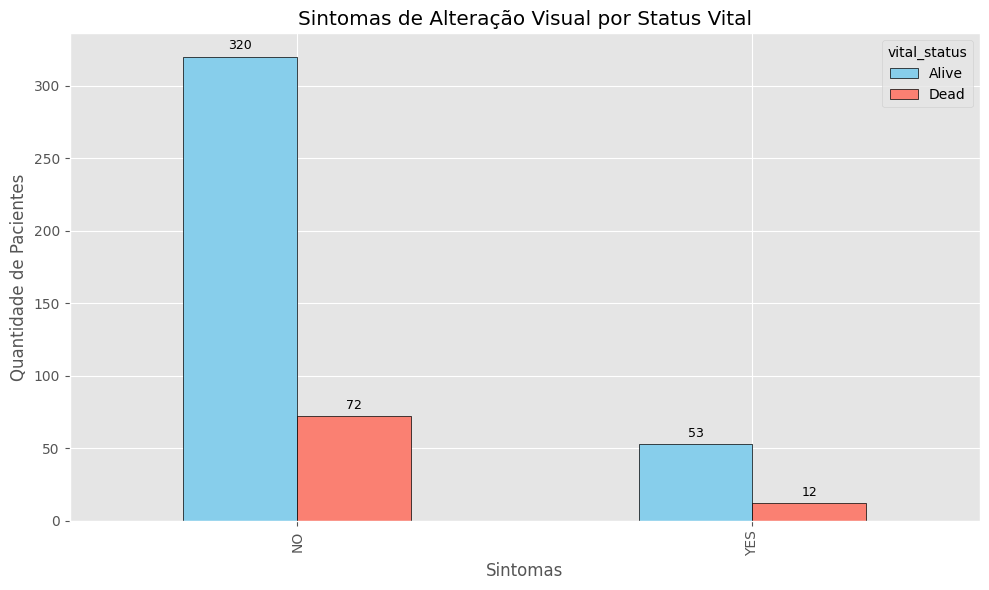

In [102]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_visual'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['symp_changes_visual','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Sintomas de Alteração Visual por Status Vital')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

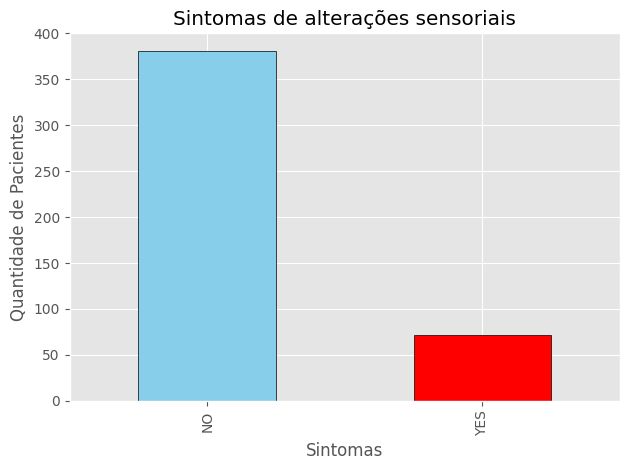

In [103]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_sensory'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['symp_changes_sensory'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'red'], edgecolor='black')

plt.title('Sintomas de alterações sensoriais')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

<ipython-input-104-37a9aa8feddf>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['symp_changes_sensory','vital_status']).size().unstack(fill_value=0)


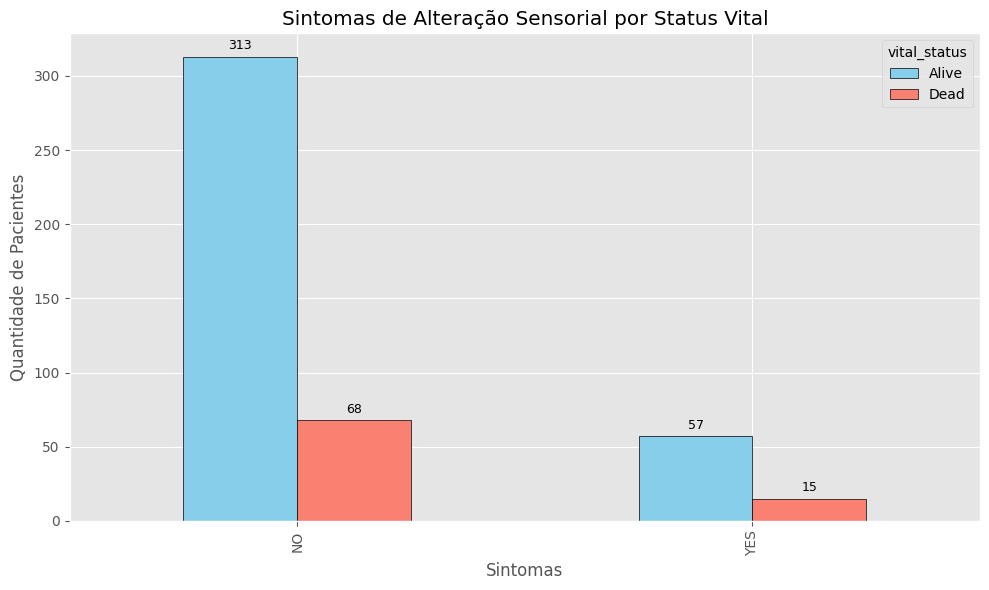

In [104]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_sensory'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['symp_changes_sensory','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Sintomas de Alteração Sensorial por Status Vital')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

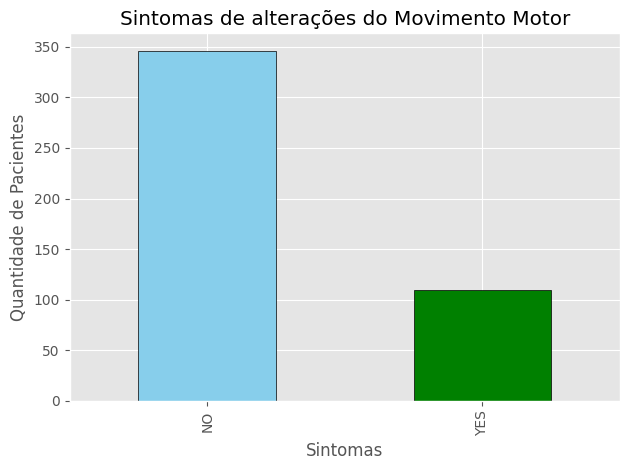

In [105]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_motor_movement'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['symp_changes_motor_movement'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Sintomas de alterações do Movimento Motor')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

<ipython-input-106-90a603189cd4>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['symp_changes_motor_movement','vital_status']).size().unstack(fill_value=0)


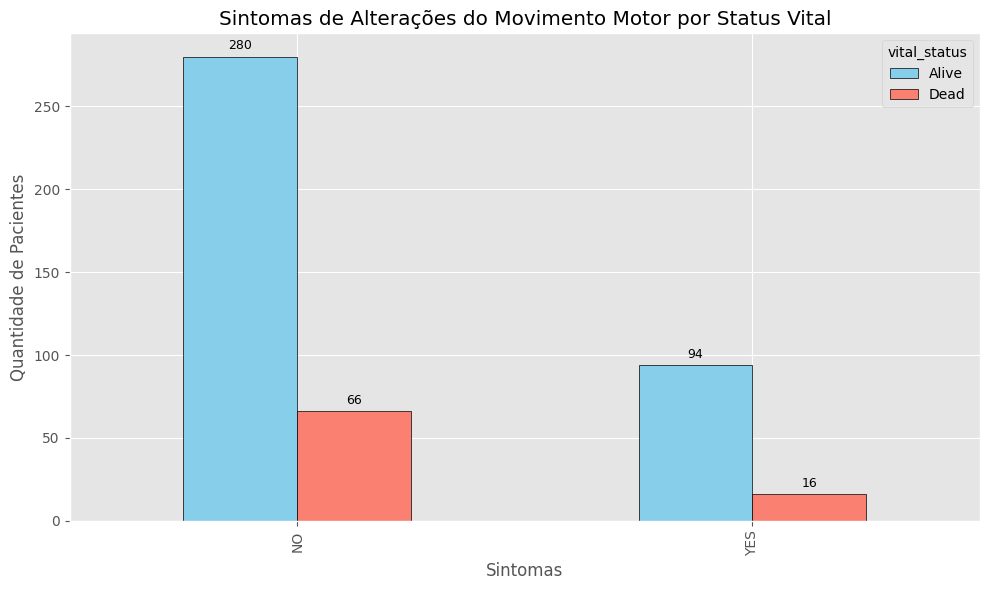

In [106]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['symp_changes_motor_movement'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['symp_changes_motor_movement','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Sintomas de Alterações do Movimento Motor por Status Vital')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

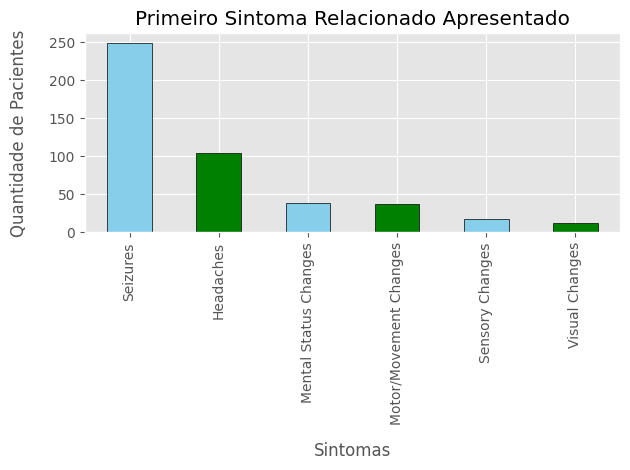

In [107]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['related_symptom_first_present'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['related_symptom_first_present'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Primeiro Sintoma Relacionado Apresentado')
plt.xlabel('Sintomas', labelpad = 12)
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

<ipython-input-108-604ad2f10063>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['related_symptom_first_present','vital_status']).size().unstack(fill_value=0)


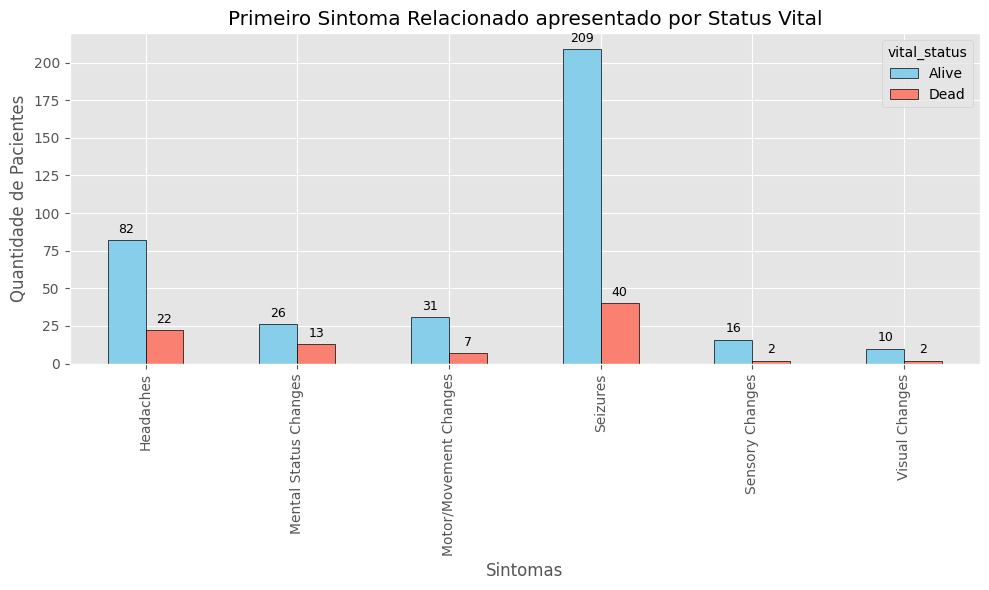

In [108]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['related_symptom_first_present'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['related_symptom_first_present','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Primeiro Sintoma Relacionado apresentado por Status Vital')
plt.xlabel('Sintomas')
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

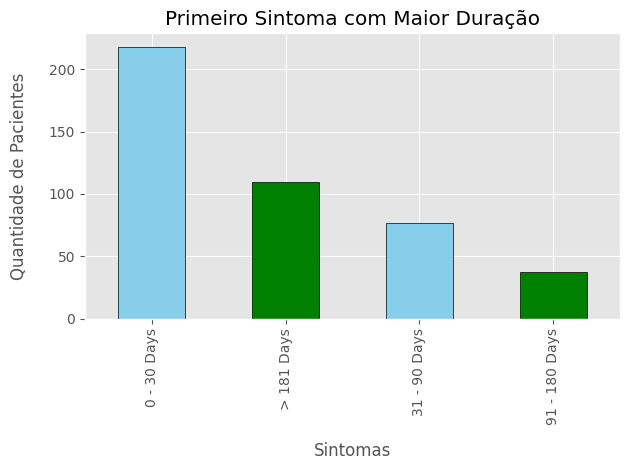

In [109]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['first_symptom_longest_duration'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['first_symptom_longest_duration'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Primeiro Sintoma com Maior Duração')
plt.xlabel('Sintomas', labelpad = 12)
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

<ipython-input-110-40bdf635cc70>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['first_symptom_longest_duration','vital_status']).size().unstack(fill_value=0)


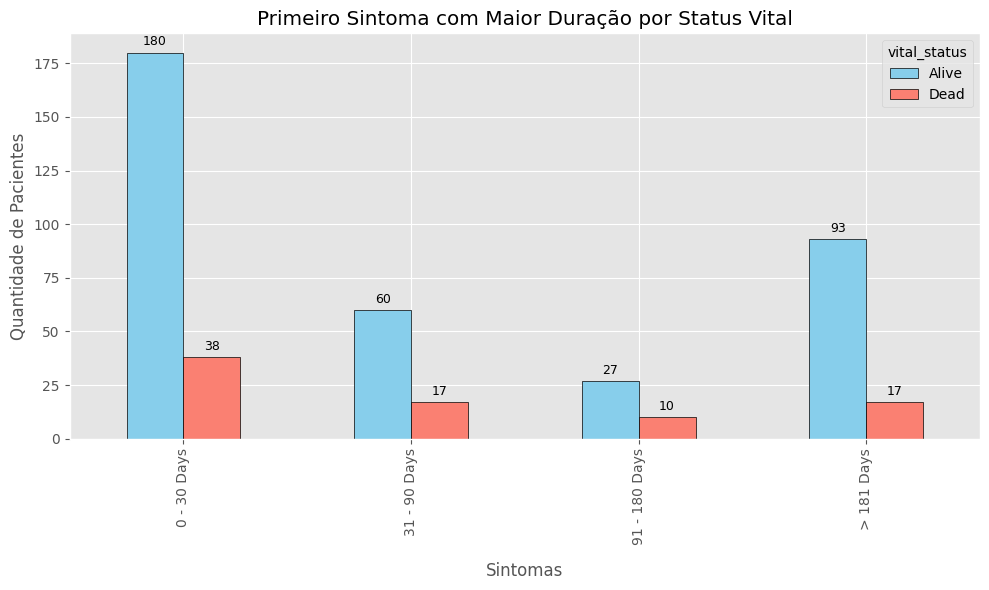

In [110]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['first_symptom_longest_duration'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['first_symptom_longest_duration','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Primeiro Sintoma com Maior Duração por Status Vital')
plt.xlabel('Sintomas',labelpad = 12)
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

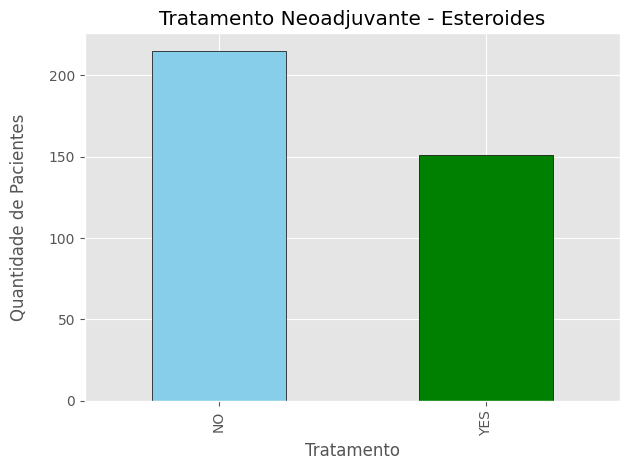

In [111]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_neoadjuvant_steroid_tx'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['history_neoadjuvant_steroid_tx'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Tratamento Neoadjuvante - Esteroides')
plt.xlabel('Tratamento')
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

<ipython-input-112-6717193a7f11>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['history_neoadjuvant_steroid_tx','vital_status']).size().unstack(fill_value=0)


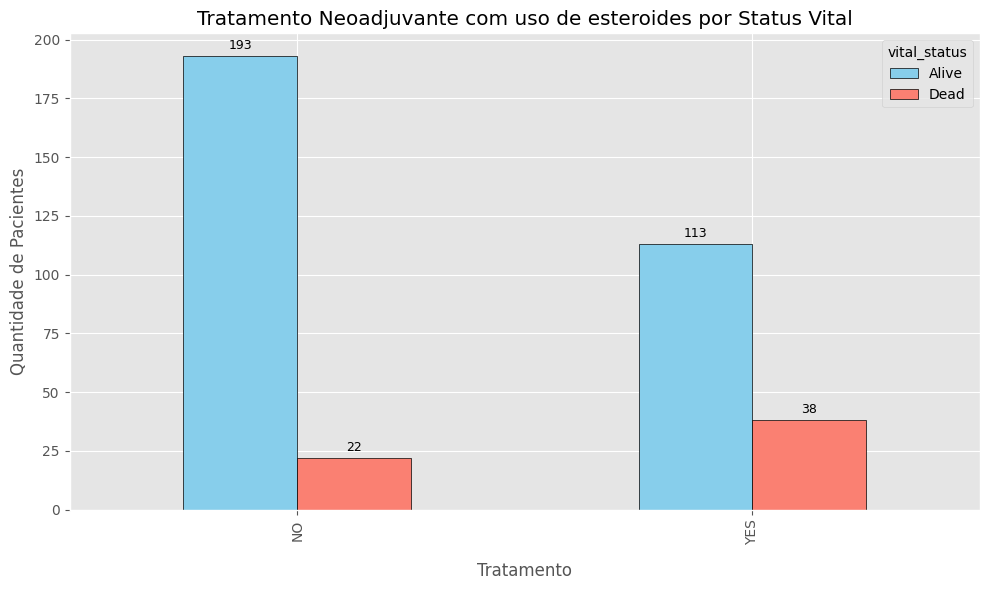

In [112]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_neoadjuvant_steroid_tx'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['history_neoadjuvant_steroid_tx','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Tratamento Neoadjuvante com uso de esteroides por Status Vital')
plt.xlabel('Tratamento',labelpad = 12)
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

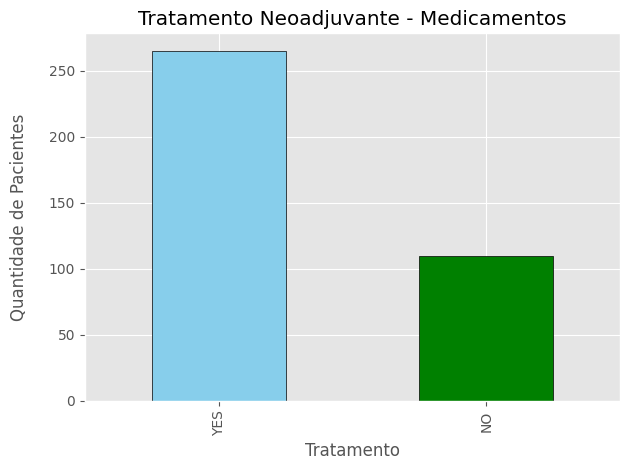

In [113]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_neoadjuvant_medication'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['history_neoadjuvant_medication'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Tratamento Neoadjuvante - Medicamentos')
plt.xlabel('Tratamento')
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

<ipython-input-114-3a641b96a343>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['history_neoadjuvant_medication','vital_status']).size().unstack(fill_value=0)


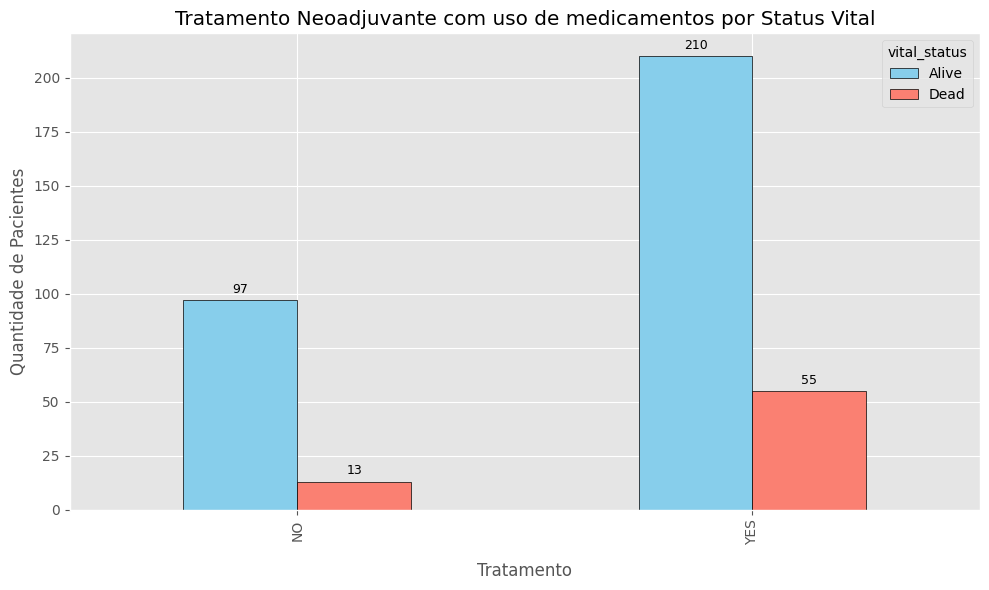

In [114]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['history_neoadjuvant_medication'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['history_neoadjuvant_medication','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Tratamento Neoadjuvante com uso de medicamentos por Status Vital')
plt.xlabel('Tratamento',labelpad = 12)
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

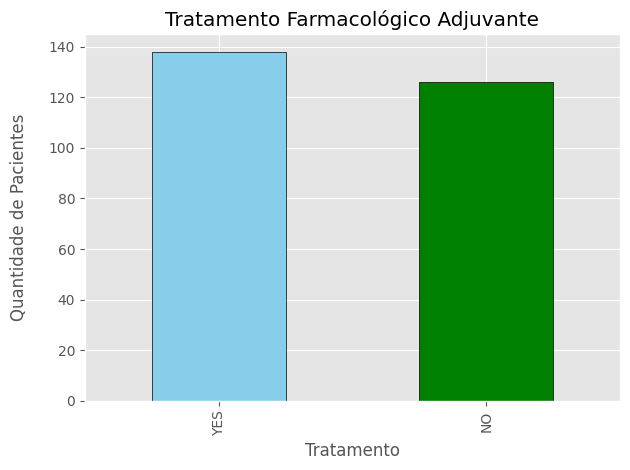

In [115]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['pharmaceutical_tx_adjuvant'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['pharmaceutical_tx_adjuvant'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Tratamento Farmacológico Adjuvante')
plt.xlabel('Tratamento')
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

<ipython-input-116-270525746252>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['pharmaceutical_tx_adjuvant','vital_status']).size().unstack(fill_value=0)


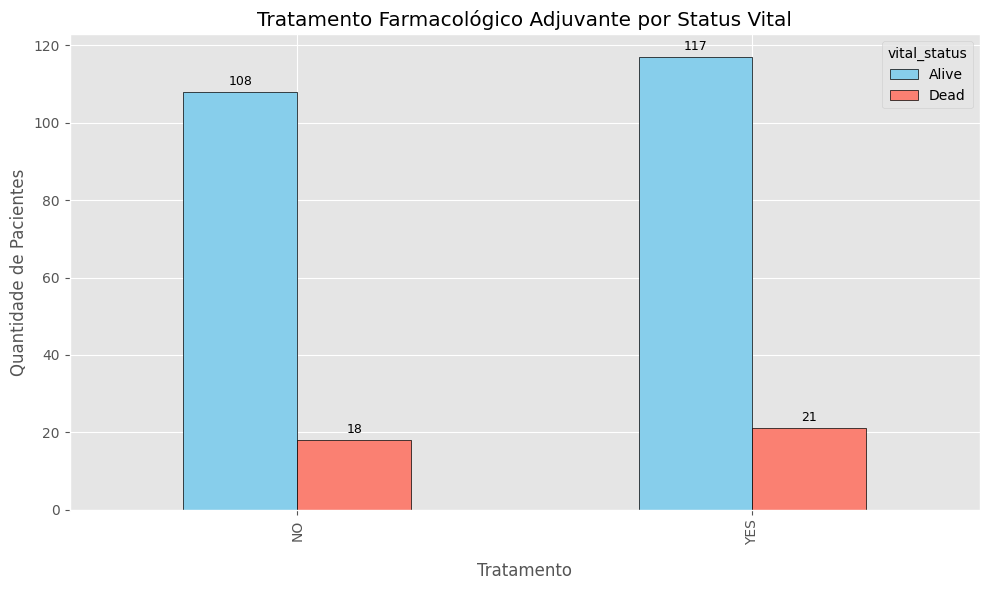

In [116]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['pharmaceutical_tx_adjuvant'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['pharmaceutical_tx_adjuvant','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Tratamento Farmacológico Adjuvante por Status Vital')
plt.xlabel('Tratamento',labelpad = 12)
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

<ipython-input-117-c512f6f754f1>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_grupo = dados_filtrados.groupby(['treatment_outcome_first_course','vital_status']).size().unstack(fill_value=0)


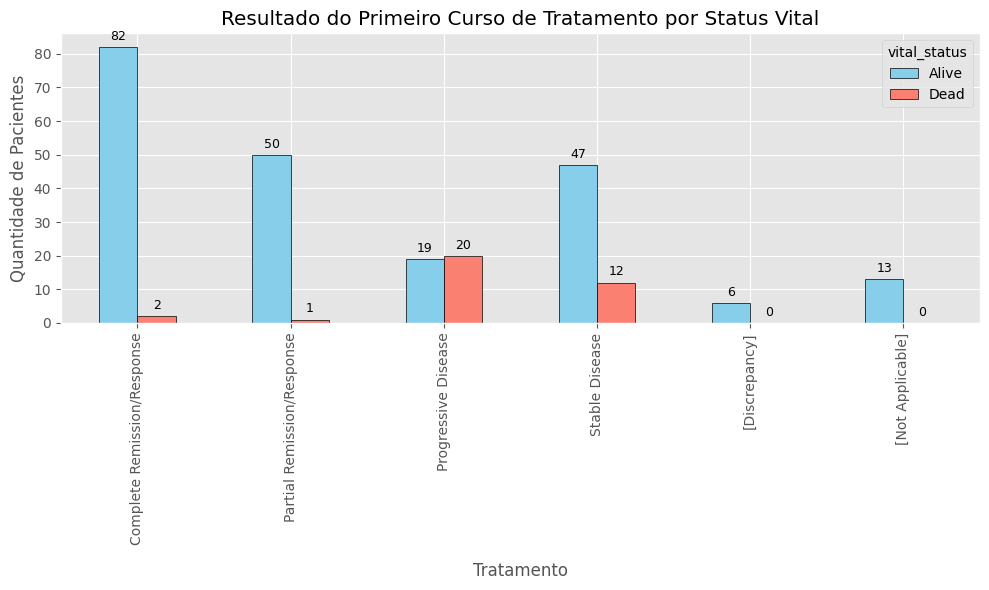

In [117]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['treatment_outcome_first_course'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_grupo = dados_filtrados.groupby(['treatment_outcome_first_course','vital_status']).size().unstack(fill_value=0)


# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_grupo = count_grupo.loc[~count_grupo.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_grupo.plot(kind='bar', edgecolor='black', figsize=(10, 6), color=['skyblue', 'salmon'])

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=9, padding = 3)

plt.title('Resultado do Primeiro Curso de Tratamento por Status Vital')
plt.xlabel('Tratamento',labelpad = 12)
plt.ylabel('Quantidade de Pacientes')
plt.tight_layout()
plt.show()

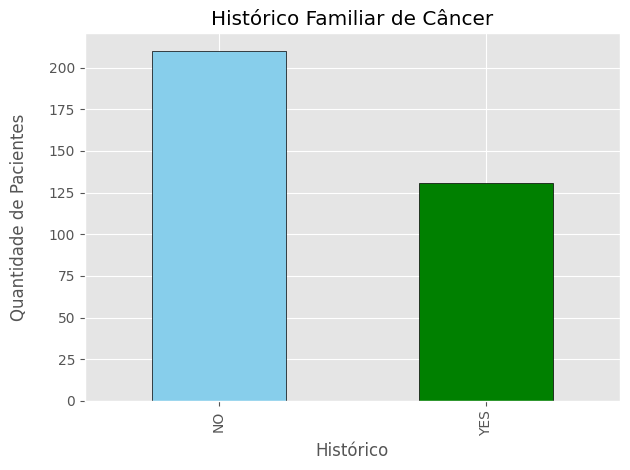

In [118]:
# Filtra os dados para remover as categorias indesejadas
dados_filtrados = clinical_validos[
    ~clinical_validos['family_history_cancer_indicator'].isin(['[Not Available]', '[Unknown]'])
]

# Conta os valores após filtro, incluindo categorias para garantir que não apareçam as indesejadas
count_rt = dados_filtrados['family_history_cancer_indicator'].value_counts()

# Remove explicitamente as categorias indesejadas do índice (caso existam)
count_rt = count_rt.loc[~count_rt.index.isin(['[Not Available]', '[Unknown]'])]

# Plot
ax = count_rt.plot(kind='bar', color=['skyblue', 'green'], edgecolor='black')

plt.title('Histórico Familiar de Câncer')
plt.xlabel('Histórico')
plt.ylabel('Quantidade de Pacientes', labelpad = 15)
plt.tight_layout()
plt.show()

In [119]:

colunas_categoricas = clinical_validos.select_dtypes(include=['object', 'category'])


niveis_por_coluna = colunas_categoricas.nunique(dropna=True)

z = niveis_por_coluna[niveis_por_coluna == 2]
w = niveis_por_coluna[niveis_por_coluna >= 3]


print("niveis 2 ")
print("\0")
print(z)
print("\0")
print("niveis 3")
print(w)


niveis 2 
 
gender          2
vital_status    2
dtype: int64
 
niveis 3
bcr_patient_barcode                513
histologic_diagnosis                 3
tumor_grade                          3
laterality                           4
tumor_site                           8
supratentorial_localization          5
race                                 7
ethnicity                            5
history_other_malignancy             4
history_neoadjuvant_treatment        4
history_ionizing_rt_to_head          4
history_seizures                     4
history_headaches                    4
symp_changes_mental_status           4
symp_changes_visual                  4
symp_changes_sensory                 4
symp_changes_motor_movement          4
related_symptom_first_present        7
first_symptom_longest_duration       5
history_neoadjuvant_steroid_tx       4
history_neoadjuvant_medication       4
tumor_status                         5
family_history_cancer_indicator      4
family_history_brain_tumor     

In [120]:
vivos = clinical_validos['vital_status']

# Computa frequências e seleciona as 3 idades mais comuns
vivos = vivos.value_counts()
print(vivos)

vital_status
Alive    422
Dead      91
Name: count, dtype: int64
